# Brain Tumour Classification using VGG19

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.image as mpimg

In [2]:
# Downloading the zipfile and extracting

!gdown 11R-D1robYjdyMZ4KooWuAlZH1WyRpCdl

Downloading...
From (original): https://drive.google.com/uc?id=11R-D1robYjdyMZ4KooWuAlZH1WyRpCdl
From (redirected): https://drive.google.com/uc?id=11R-D1robYjdyMZ4KooWuAlZH1WyRpCdl&confirm=t&uuid=ece6b70a-1d0e-435f-825b-7161fd600683
To: /content/BrainTumor_1.zip
100% 514M/514M [00:07<00:00, 73.0MB/s]


## Data Fetching and Exploratory Data Analysis

In [3]:
# Unzip the file
import zipfile

zip_ref = zipfile.ZipFile("BrainTumor_1.zip")
zip_ref.extractall()
zip_ref.close()

In [4]:
# Lets store our training and testing directories

train_dir = "/content/BrainTumor_1/Train"
test_dir = "/content/BrainTumor_1/Test"

Text(3, 6380, '6380')

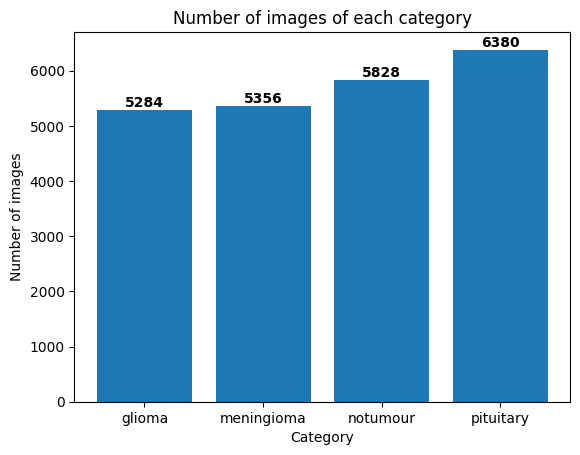

In [5]:
# Plotting the number of images of each category
import os

glioma_count = len(os.listdir("/content/BrainTumor_1/Train/glioma"))
meningioma_count = len(os.listdir("/content/BrainTumor_1/Train/meningioma"))
pituitary_count = len(os.listdir("/content/BrainTumor_1/Train/notumor"))
no_tumor_count = len(os.listdir("/content/BrainTumor_1/Train/pituitary"))

plt.bar(["glioma","meningioma","notumour","pituitary"],[glioma_count,meningioma_count,no_tumor_count,pituitary_count])
plt.title("Number of images of each category")
plt.xlabel("Category")
plt.ylabel("Number of images")

plt.text(0,glioma_count,s=glioma_count,fontweight='bold',fontsize='medium',ha='center',va='bottom')
plt.text(1,meningioma_count,s=meningioma_count,fontweight='bold',fontsize='medium',ha='center',va='bottom')
plt.text(2,no_tumor_count,s=no_tumor_count,fontweight='bold',fontsize='medium',ha='center',va='bottom')
plt.text(3,pituitary_count,s=pituitary_count,fontweight='bold',fontsize='medium',ha='center',va='bottom')

(345, 300, 3)

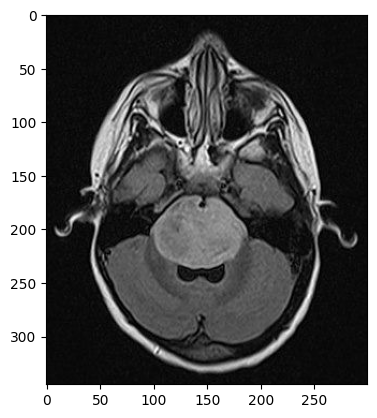

In [6]:
# Testing the shape of one image to understand the dimensions

image = mpimg.imread("/content/BrainTumor_1/Train/meningioma/0200.jpg")
plt.imshow(image)
image.shape

## Data Preprocessing

In [7]:
# Getting the data loaders ready to load data into variables

from tensorflow.keras.preprocessing import image_dataset_from_directory


train_data,validation_data = image_dataset_from_directory(directory=train_dir,
                                          label_mode='int',
                                          color_mode='grayscale',
                                          batch_size=32,
                                          image_size=(128,128),
                                          seed=42,
                                          subset="both",
                                          validation_split=0.2,
                                          shuffle=True)

test_data = image_dataset_from_directory(directory=test_dir,
                                          label_mode='int',
                                          color_mode='grayscale',
                                          batch_size=32,
                                          image_size=(128,128),
                                          seed=42,
                                          shuffle=True)

Found 22848 files belonging to 4 classes.
Using 18279 files for training.
Using 4569 files for validation.
Found 1311 files belonging to 4 classes.


In [8]:
# Lets store the class names to access them

class_names = train_data.class_names
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

Checking for class imabalances in the train data

In [9]:
import numpy as np

# Initialize counts
n_glioma = 0
n_meningioma = 0
n_notumor = 0
n_pituitary = 0


for images, labels in train_data:
    labels_np = labels.numpy()


    for label in labels_np:
        if class_names[int(label)] == 'glioma':
            n_glioma += 1
        elif class_names[int(label)] == 'meningioma':
            n_meningioma += 1
        elif class_names[int(label)] == 'notumor':
            n_notumor += 1
        elif class_names[int(label)] == 'pituitary':
            n_pituitary += 1


print("Number of samples for each class:")
print("Glioma:", n_glioma)
print("Meningioma:", n_meningioma)
print("No Tumor:", n_notumor)
print("Pituitary:", n_pituitary)

print(n_glioma+n_meningioma+n_notumor+n_pituitary)


Number of samples for each class:
Glioma: 4230
Meningioma: 4332
No Tumor: 5098
Pituitary: 4619
18279


Calculate class weights to be used in fit to reduce the effect of class imbalances on the model training

In [10]:
# Calculate the weights of each class to deal wiht class imbalances

glioma_weight = 0
meningioma_weight = 0
notumor_weight = 0
pituitary_weight =0
n = 18279

class_count = np.array([4230,4332,5098,4619])

class_weights = {0:glioma_weight,1:meningioma_weight,2:notumor_weight,3:pituitary_weight}

for i in range(4):
    class_weights[i] = (n/(4*class_count[i]))

class_weights


{0: 1.0803191489361703,
 1: 1.054882271468144,
 2: 0.89638093369949,
 3: 0.9893375189434943}

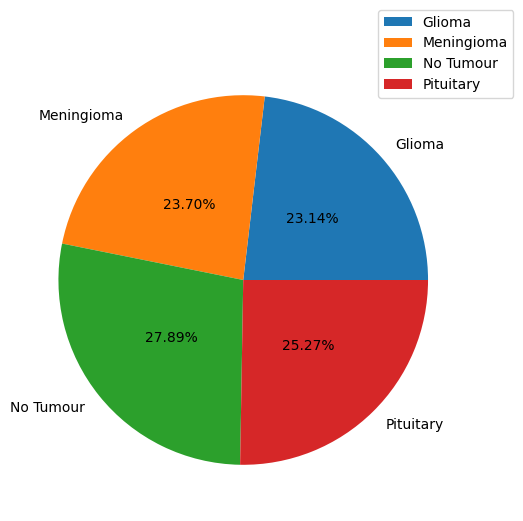

In [11]:
import matplotlib.pyplot as plt

samples_count = [4230, 4332, 5098, 4619]
samples_percentage = []
total = sum(samples_count)

for i in samples_count:
    k = i / total
    samples_percentage.append(k)

plt.figure(figsize=(6, 6))
plt.pie(
    samples_count,
    labels=["Glioma", "Meningioma", "No Tumour", "Pituitary"],
    autopct=lambda p: f'{p:.2f}%',
    pctdistance=0.5,
    labeldistance=1.1,
    colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
)

plt.legend(["Glioma", "Meningioma", "No Tumour", "Pituitary"], bbox_to_anchor=(1.1, 1.1))

plt.show()


tf.Tensor(1, shape=(), dtype=int32)
(128, 128, 1)


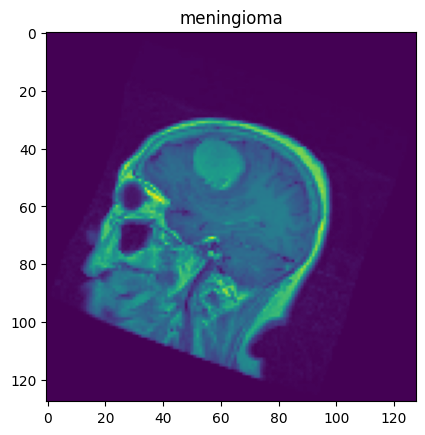

In [12]:
# Lets take an image and check its shape

for image,labels in train_data.take(1):
  plt.imshow(image[0]) #view the first image of the batch
  print(labels[0]) #view label of first image
  plt.title(f"{class_names[labels[0]]}")
  print(image[0].shape)

In [13]:
# Create a function to view multiple images at once

def view_images(train_data):
  for images,labels in train_data.take(1):
    plt.figure()
    for i in range(4):
      plt.subplot(2,2,i+1)
      plt.imshow(images[i])
      plt.title(f"{class_names[labels[i]]}")
      plt.xlabel(f"{images[i].shape}")
    plt.tight_layout()



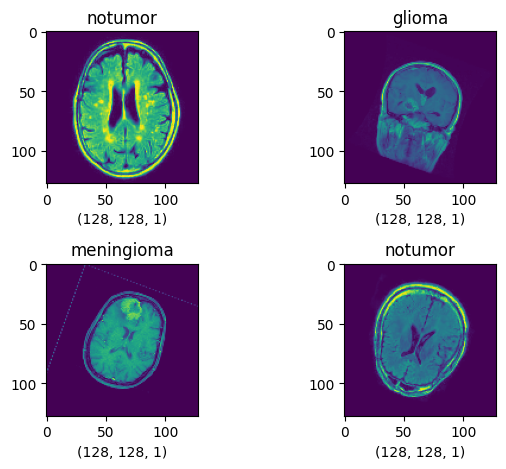

In [14]:
view_images(train_data)

In [15]:
# Check the min and max values of image vector(if needed rescale)
for images,labels in train_data.take(1):
  print(tf.reduce_min(images[0]))
  print(tf.reduce_max(images[0]))

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(255.0, shape=(), dtype=float32)


> **Note:**Since Pre-Trained models were trained on rgb images lets convert our images to rgb

In [16]:
# Create a custom function and combine with tensorflow function to convert batches of images to rgb


def grayscale_to_rgb(images,labels):
  images = tf.image.grayscale_to_rgb(images)
  return images,labels

train_data = train_data.map(grayscale_to_rgb)
validation_data = validation_data.map(grayscale_to_rgb)
test_data = test_data.map(grayscale_to_rgb)



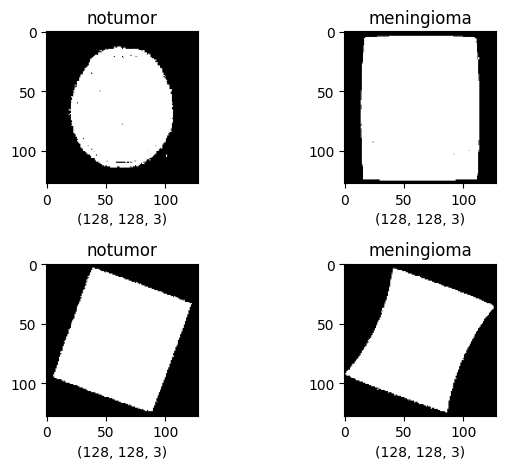

In [17]:
# Lets check if our images are succesfully converted to rgb
view_images(train_data)

In [18]:
# Lets check the min and max values of the images

for images,labels in train_data.take(1):
  print(tf.reduce_min(images[0]))
  print(tf.reduce_max(images[0]))

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(230.73836, shape=(), dtype=float32)


> **Note:**We can see that the min and max values are between 0 and 255,but in order to view the images using matplotlib we need to normalize it to between 0 and 1.

In [19]:
# Lets retrieve number of batches

len(train_data)

572

In [20]:
from tensorflow.keras import layers
# create a  rescaling layer

rescale_layer = layers.Rescaling(1/255.)

In [21]:
# Lets rescale the images batch-wise

def rescale_over_batches(images,labels):
  images = rescale_layer(images)
  return images,labels

train_data = train_data.map(rescale_over_batches)
validation_data = validation_data.map(rescale_over_batches)
test_data = test_data.map(rescale_over_batches)

In [22]:
for images,labels in train_data.take(1):
  print(tf.reduce_min(images[0]))
  print(tf.reduce_max(images[0]))

tf.Tensor(0.023651963, shape=(), dtype=float32)
tf.Tensor(0.9995099, shape=(), dtype=float32)


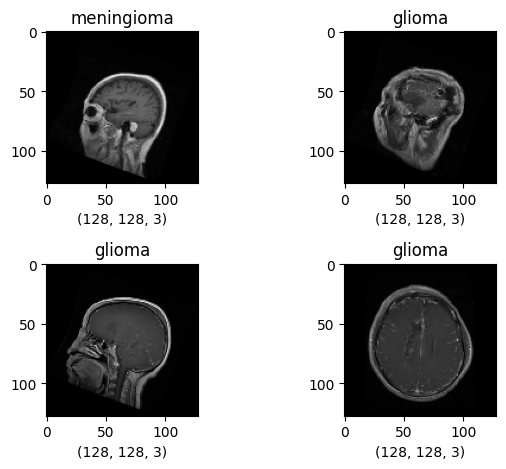

In [23]:
# Since rescaling is done lets again try to view the images

view_images(train_data)

> **Note:**Since prerpocessing is done,lets start by building a Pre Trained model

## Model Building

### VGG19 Model

In [24]:
from tensorflow.keras.applications import VGG19

base_model = VGG19(include_top=False)
base_model.trainable = False

In [25]:
import random
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)
# Create an input layer
inputs = tf.keras.layers.Input(shape=(128,128,3))

# Preprocess layer of VCG19
x = tf.keras.applications.vgg19.preprocess_input(inputs)

# Import the VCG 19 pre-trained model
x = base_model(inputs,training=False)

# Lets introduce a AveragePooling layer to redduce the dimensions
x = layers.GlobalAvgPool2D()(x)

# Add a regularization layer
x = layers.Dense(128)(x)

# Add batch normalization
x = layers.BatchNormalization()(x)

#Add actiavtion layer
x = tf.keras.activations.relu(x)

#Add dropout layer
x = layers.Dropout(0.5)(x)

# Lets define the output layer
outputs = layers.Dense(4,activation='softmax')(x)

# Build the model
model_1 = tf.keras.Model(inputs,outputs)

In [26]:
model_1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg19 (Functional)                   │ (None, 4, 4, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,091,076 (76.64 MB)

 Trainable params: 66,436 (259.52 KB)

 Non-trainable params: 20,024,640 (76.39 MB)

In [27]:
def plot_loss_curves(history):
  train_loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  train_accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  plt.figure()
  plt.subplot(2,1,1)
  plt.title("Loss curves")
  plt.plot(train_loss,label="Training Loss")
  plt.plot(val_loss,label="Validation Loss")
  plt.xlabel("Epochs")
  plt.ylabel("loss")
  plt.legend()


  plt.subplot(2,1,2)
  plt.title("Accuracy curves")
  plt.plot(train_accuracy,label="Training Accuracy")
  plt.plot(val_accuracy,label="Validation Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.tight_layout()

In [28]:
# Fine tuning the model

for i,layer in enumerate(base_model.layers):
  print(i,layer.name,layer.trainable)

0 input_layer False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_conv4 False
11 block3_pool False
12 block4_conv1 False
13 block4_conv2 False
14 block4_conv3 False
15 block4_conv4 False
16 block4_pool False
17 block5_conv1 False
18 block5_conv2 False
19 block5_conv3 False
20 block5_conv4 False
21 block5_pool False


In [29]:
# Unfreeze last 10 layers

base_model.trainable = False

for layer in base_model.layers[-10:]:
  layer.trainable=True

In [30]:
for layer in base_model.layers[-10:]:
  print(layer,layer.trainable)

<Conv2D name=block4_conv1, built=True> True
<Conv2D name=block4_conv2, built=True> True
<Conv2D name=block4_conv3, built=True> True
<Conv2D name=block4_conv4, built=True> True
<MaxPooling2D name=block4_pool, built=True> True
<Conv2D name=block5_conv1, built=True> True
<Conv2D name=block5_conv2, built=True> True
<Conv2D name=block5_conv3, built=True> True
<Conv2D name=block5_conv4, built=True> True
<MaxPooling2D name=block5_pool, built=True> True


In [31]:
# Recompile the model
model_1.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [32]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(patience=2,
                                                          factor=0.1,
                                                          min_lr=1e-8)

checkpoint_path = "vgg19_fine_tune.weights.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                save_best_only=True,
                                                save_weights_only=True,
                                                monitor='val_loss')

csv_logger = tf.keras.callbacks.CSVLogger("vgg19_fine_tune.csv")

In [33]:
# Fit the model
history = model_1.fit(train_data,
                                 epochs=25,
                                 validation_data=validation_data,
                                callbacks=[reduce_lr,checkpoint,csv_logger],
                                class_weight=class_weights)

Epoch 1/25
572/572 ━━━━━━━━━━━━━━━━━━━━ 106s 161ms/step - accuracy: 0.7735 - loss: 0.6088 - val_accuracy: 0.7949 - val_loss: 0.8419 - learning_rate: 1.0000e-04
Epoch 2/25
572/572 ━━━━━━━━━━━━━━━━━━━━ 114s 132ms/step - accuracy: 0.9228 - loss: 0.2232 - val_accuracy: 0.6684 - val_loss: 1.4697 - learning_rate: 1.0000e-04
Epoch 3/25
572/572 ━━━━━━━━━━━━━━━━━━━━ 73s 127ms/step - accuracy: 0.9522 - loss: 0.1519 - val_accuracy: 0.8501 - val_loss: 0.6818 - learning_rate: 1.0000e-04
Epoch 4/25
572/572 ━━━━━━━━━━━━━━━━━━━━ 75s 132ms/step - accuracy: 0.9672 - loss: 0.1061 - val_accuracy: 0.9645 - val_loss: 0.1081 - learning_rate: 1.0000e-04
Epoch 5/25
572/572 ━━━━━━━━━━━━━━━━━━━━ 79s 127ms/step - accuracy: 0.9752 - loss: 0.0823 - val_accuracy: 0.9411 - val_loss: 0.1901 - learning_rate: 1.0000e-04
Epoch 6/25
572/572 ━━━━━━━━━━━━━━━━━━━━ 82s 127ms/step - accuracy: 0.9820 - loss: 0.0655 - val_accuracy: 0.9418 - val_loss: 0.1905 - learning_rate: 1.0000e-04
Epoch 7/25
572/572 ━━━━━━━━━━━━━━━━━━━━ 86s 

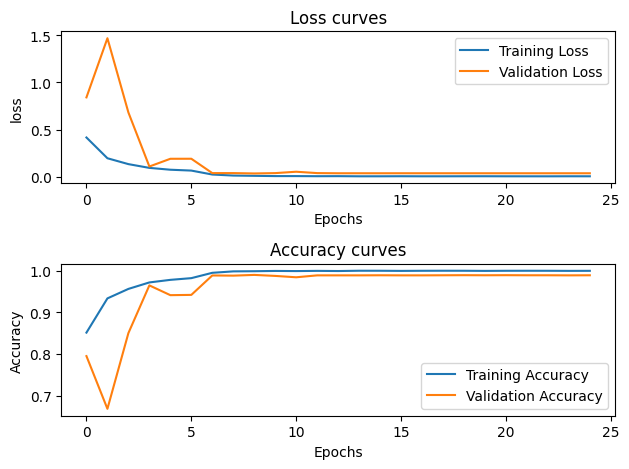

In [34]:
plot_loss_curves(history)

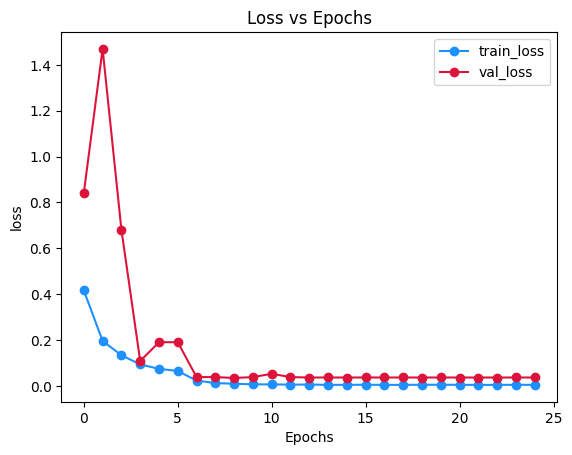

In [35]:
plt.figure()
plt.plot(history.history["loss"],label="train_loss",c="dodgerblue",marker='o')
plt.plot(history.history["val_loss"],label="val_loss",c="crimson",marker='o')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("Loss vs Epochs")
plt.legend()


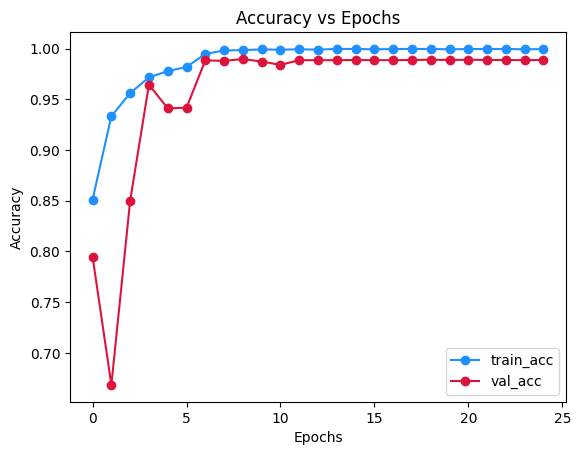

In [36]:
plt.figure()
plt.plot(history.history["accuracy"],label="train_acc",c="dodgerblue",marker="o")
plt.plot(history.history["val_accuracy"],label="val_acc",c="crimson",marker="o")
plt.xlabel("Epochs")
plt.title("Accuracy vs Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [47]:
model_1.evaluate(test_data)

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9783 - loss: 0.0489


[0.045596830546855927, 0.9824561476707458]

## Model Evaluation

In [48]:
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix,f1_score,roc_auc_score


y_true = []
y_pred = []

for xlabel, ylabel in test_data:
    prediction = model_1.predict(xlabel)
    y_pred.extend(np.argmax(prediction, axis=1))
    y_true.extend(ylabel.numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

In [49]:
from sklearn.metrics import classification_report, recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, roc_auc_score
import numpy as np

# Assuming y_true and y_pred are the ground truth and predicted labels
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average=None, zero_division=0)
f1 = f1_score(y_true, y_pred, average=None, zero_division=0)
recall = recall_score(y_true, y_pred, average=None, zero_division=0)
confusion_matrix = confusion_matrix(y_true, y_pred)

print(f"Accuracy Score: {accuracy}\n")
print(f"Precision Score: {precision}\n")
print(f"F1 Score: {f1}\n")
print(f"Recall Score: {recall}\n")
print(f"Confusion Matrix:\n{confusion_matrix}")




Accuracy Score: 0.9824561403508771

Precision Score: [0.98305085 0.96103896 0.99753086 0.98349835]

F1 Score: [0.97478992 0.96416938 0.99753086 0.98839138]

Recall Score: [0.96666667 0.96732026 0.99753086 0.99333333]

Confusion Matrix:
[[290   9   0   1]
 [  5 296   1   4]
 [  0   1 404   0]
 [  0   2   0 298]]


Text(50.72222222222221, 0.5, 'True Label')

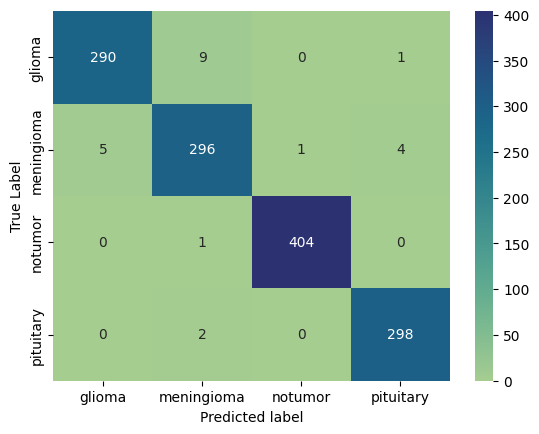

In [50]:
import seaborn as sns
plt.figure()
sns.heatmap(confusion_matrix,annot=True,
           xticklabels=class_names,
           yticklabels=class_names,fmt=".0f",cmap="crest")
plt.xlabel('Predicted label')
plt.ylabel('True Label')


## Save the model

In [46]:
model_1.save("VGG19_model.keras")